### Data Loading and Inspection: Load the dataset into Python and perform basic inspections (head, info, describe).


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
import pandas as pd
import numpy as np

# Setting a seed for reproducibility
np.random.seed(0)

# Creating a larger mock dataset for a clinical trial
n_patients = 500
patient_ids = range(1, n_patients + 1)
ages = np.random.randint(18, 80, size=n_patients)
genders = np.random.choice(['Male', 'Female'], size=n_patients)
treatment_groups = np.random.choice(['Control', 'Experimental'], size=n_patients)
blood_pressure = np.random.normal(120, 15, size=n_patients)
cholesterol = np.random.normal(200, 30, size=n_patients)

# Introducing NaN values
# Randomly setting 5% of blood pressure and cholesterol values to NaN
nan_indices_bp = np.random.choice(n_patients, size=int(0.05 * n_patients), replace=False)
nan_indices_chol = np.random.choice(n_patients, size=int(0.05 * n_patients), replace=False)

blood_pressure[nan_indices_bp] = np.nan
cholesterol[nan_indices_chol] = np.nan

# Assembling the dataset
extended_clinical_trial_data = pd.DataFrame({
    'PatientID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'TreatmentGroup': treatment_groups,
    'BloodPressure': blood_pressure,
    'Cholesterol': cholesterol
})

# Saving the dataset to a CSV file
extended_file_path = './extended_clinical_trial_data.csv'
extended_clinical_trial_data.to_csv(extended_file_path, index=False)

extended_file_path


'./extended_clinical_trial_data.csv'

In [70]:
df = pd.read_csv('./extended_clinical_trial_data.csv')
df = df.set_index('PatientID')
df

,Age,Gender,TreatmentGroup,BloodPressure,Cholesterol
PatientID,,,,,
1,62,Male,Control,132.485681,191.059697
2,65,Male,Experimental,113.674412,203.680647
3,71,Male,Experimental,86.234576,165.435967
4,18,Female,Experimental,94.714138,168.491486
5,21,Male,Control,131.935592,225.584325
...,...,...,...,...,...
496,60,Female,Experimental,140.580678,198.096242
497,71,Male,Experimental,114.658488,209.923341
498,66,Male,Control,111.603010,188.409855


In [71]:
df.describe()

,Age,BloodPressure,Cholesterol
count,500.000000,475.000000,475.000000
mean,48.104000,119.610362,199.826981
std,18.062938,14.666885,29.479551
min,18.000000,75.575245,112.508453
25%,33.000000,110.027703,180.211799
50%,48.000000,119.917125,201.406494
75%,64.000000,129.395346,218.084909
max,79.000000,165.859865,287.348492


In [72]:
dropped_df = df.dropna()
dropped_df

,Age,Gender,TreatmentGroup,BloodPressure,Cholesterol
PatientID,,,,,
1,62,Male,Control,132.485681,191.059697
2,65,Male,Experimental,113.674412,203.680647
3,71,Male,Experimental,86.234576,165.435967
4,18,Female,Experimental,94.714138,168.491486
5,21,Male,Control,131.935592,225.584325
...,...,...,...,...,...
496,60,Female,Experimental,140.580678,198.096242
497,71,Male,Experimental,114.658488,209.923341
498,66,Male,Control,111.603010,188.409855


### Data Cleaning: Handle any missing or inconsistent data.

<Axes: >

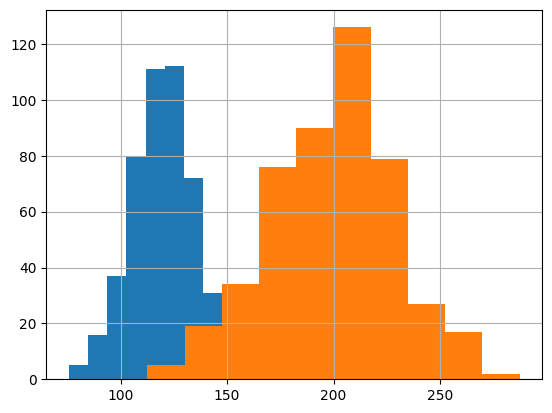

In [73]:
# impute values with mean/median of Blood Pressure/Cholesterol => Visualize distrubution of columns to see if normal

df['BloodPressure'].hist()
df['Cholesterol'].hist()

In [74]:
# df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
# df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)

df.isna().value_counts()

Age    Gender  TreatmentGroup  BloodPressure  Cholesterol
False  False   False           False          False          452
                                              True            23
                               True           False           23
                                              True             2
dtype: int64

In [75]:
# More complex imputation => Find the mean blood pressure for each missing age and impute that way

mean_cholesterol_BP = df.groupby('Age').mean()
BP = mean_cholesterol_BP['BloodPressure']
cholesterol = mean_cholesterol_BP['Cholesterol']

df['BloodPressure'] = df.apply(lambda row: BP[row['Age']] if pd.isna(row['BloodPressure']) else row['BloodPressure'], axis=1)
df['BloodPressure']

df['Cholesterol'] = df.apply(lambda row: cholesterol[row['Age']] if pd.isna(row['BloodPressure']) else row['BloodPressure'], axis = 1)

df.isna().value_counts()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_57049/1099673843.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_cholesterol_BP = df.groupby('Age').mean()


Age    Gender  TreatmentGroup  BloodPressure  Cholesterol
False  False   False           False          False          500
dtype: int64

### Data Transformation: Create a new column to categorize patients based on an outcome measure (e.g., high vs. normal blood pressure).

In [76]:
high_BP = df.describe()['BloodPressure']['75%']
high_cholesterol = df.describe()['Cholesterol']['75%']

df['BP_Classification'] = df.apply(lambda row: 'High' if row['BloodPressure'] > high_BP else 'Normal', axis=1)
df['Cholesterol_Classification'] = df.apply(lambda row: 'High' if row['Cholesterol'] > high_cholesterol else 'Normal', axis = 1)

### Basic Analysis: Calculate the average of a particular measure for both treatment groups.


In [77]:
# Already doen above

### Model Preparation: Prepare the data for a simple logistic regression model (e.g., predict treatment success based on patient characteristics).

In [78]:
df

,Age,Gender,TreatmentGroup,BloodPressure,Cholesterol,BP_Classification,Cholesterol_Classification
PatientID,,,,,,,
1,62,Male,Control,132.485681,132.485681,High,High
2,65,Male,Experimental,113.674412,113.674412,Normal,Normal
3,71,Male,Experimental,86.234576,86.234576,Normal,Normal
4,18,Female,Experimental,94.714138,94.714138,Normal,Normal
5,21,Male,Control,131.935592,131.935592,High,High
...,...,...,...,...,...,...,...
496,60,Female,Experimental,140.580678,140.580678,High,High
497,71,Male,Experimental,114.658488,114.658488,Normal,Normal
498,66,Male,Control,111.603010,111.603010,Normal,Normal


In [81]:
from sklearn.linear_model import LogisticRegression

features = df[['Age', 'Gender', 'TreatmentGroup', 'BloodPressure', 'Cholesterol']]
cho_labels = df['Cholesterol_Classification']
bp_labels = df['BP_Classification']


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [95]:
scaler = StandardScaler()
cont_data = pd.DataFrame(scaler.fit_transform(df[['Age', 'BloodPressure', 'Cholesterol']],), columns=['Age', 'Blood_Pressure', 'Cholesterol'])
cont_data

encoder = LabelEncoder()
g = pd.Series(encoder.fit_transform(df['Gender']))
t = pd.Series(encoder.fit_transform(df['TreatmentGroup']))


ord_data = pd.concat([g,t], axis=1)
ord_data.columns = ['Gender', 'Treatment']

new_features = pd.concat([cont_data, ord_data], axis=1)
X=new_features.to_numpy()
X

array([[ 0.77008054,  0.89397698,  0.89397698,  1.        ,  0.        ],
       [ 0.93633281, -0.41989641, -0.41989641,  1.        ,  1.        ],
       [ 1.26883736, -2.33643216, -2.33643216,  1.        ,  1.        ],
       ...,
       [ 0.99175024, -0.56457348, -0.56457348,  1.        ,  0.        ],
       [-0.00576341, -0.2571076 , -0.2571076 ,  1.        ,  1.        ],
       [ 1.60134191, -0.31252804, -0.31252804,  0.        ,  0.        ]])

In [97]:
labels = encoder.fit_transform(bp_labels)
y = labels

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [103]:
predictions = model.predict(X_test)

In [104]:
model.score(X_test, y_test)

0.99

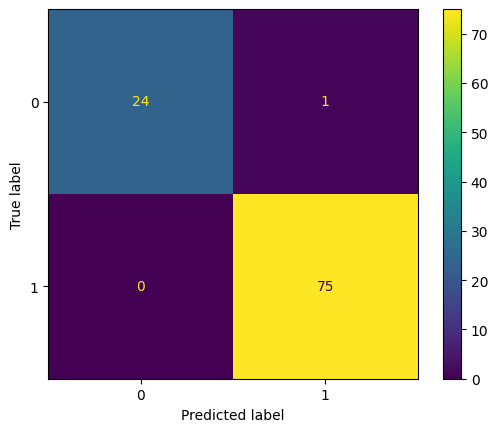

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=model.classes_)

### Use a statsmodels library to build a linear regression

In [114]:
sm_data = pd.concat([new_features, pd.Series(labels, name= 'Label')], axis = 1)

sm_data

,Age,Blood_Pressure,Cholesterol,Gender,Treatment,Label
0,0.770081,0.893977,0.893977,1,0,0
1,0.936333,-0.419896,-0.419896,1,1,1
2,1.268837,-2.336432,-2.336432,1,1,1
3,-1.668286,-1.744177,-1.744177,0,1,1
4,-1.502034,0.855556,0.855556,1,0,0
...,...,...,...,...,...,...
495,0.659246,1.459372,1.459372,0,1,0
496,1.268837,-0.351164,-0.351164,1,1,1
497,0.991750,-0.564573,-0.564573,1,0,1
498,-0.005763,-0.257108,-0.257108,1,1,1


In [116]:
df

,Age,Gender,TreatmentGroup,BloodPressure,Cholesterol,BP_Classification,Cholesterol_Classification
PatientID,,,,,,,
1,62,Male,Control,132.485681,132.485681,High,High
2,65,Male,Experimental,113.674412,113.674412,Normal,Normal
3,71,Male,Experimental,86.234576,86.234576,Normal,Normal
4,18,Female,Experimental,94.714138,94.714138,Normal,Normal
5,21,Male,Control,131.935592,131.935592,High,High
...,...,...,...,...,...,...,...
496,60,Female,Experimental,140.580678,140.580678,High,High
497,71,Male,Experimental,114.658488,114.658488,Normal,Normal
498,66,Male,Control,111.603010,111.603010,Normal,Normal


In [120]:
import statsmodels.formula.api as smf

results = smf.ols('Cholesterol ~ Age + TreatmentGroup + Gender', df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2157
Date:                Fri, 01 Dec 2023   Prob (F-statistic):              0.886
Time:                        12:34:35   Log-Likelihood:                -2039.9
No. Observations:                 500   AIC:                             4088.
Df Residuals:                     496   BIC:                             4105.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [123]:
torch_features = new_features[['Age', 'Gender', 'Treatment']]
torch_output = new_features['Blood_Pressure']

In [130]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

class MyDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self, idx):
        X = self.inputs[idx]
        Y = self.targets[idx]
        return X,Y
    
data = MyDataset(torch.tensor(torch_features.values.astype('float32')), torch.tensor(torch_output.values.astype('float32')))
data_loader = DataLoader(data, batch_size=32, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(feature_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer_size, output_size)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    

feature_size = 3
hidden_layer_size = 100
feature_size = 3
output_size = 1
epochs = 100
lr = .001
model = Net()
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()




for epoch in range(epochs):
    for idx, (input, label) in enumerate(data_loader):
        prediction = model(input)
        loss = criterion(prediction, label)
        print(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()




/Users/jaredperez/opt/miniconda3/envs/infinity/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.8703907132148743
1.1539252996444702
0.9737916588783264
1.4540870189666748
0.8912340998649597
1.0951480865478516
1.2028957605361938
0.8227474689483643
1.2554609775543213
1.0494263172149658
1.0691421031951904
1.0747439861297607
0.9243617057800293
0.7221184968948364
0.6766530871391296
0.9052249789237976
1.2055155038833618
0.7314046621322632
0.7870607972145081
0.697273850440979
1.1873152256011963
1.493537425994873
0.9770342111587524
0.7767341136932373
0.46327561140060425
0.8237865567207336
1.0783723592758179
1.4811441898345947
1.032763957977295
0.8145462274551392
1.0697181224822998
1.7636255025863647
0.7784693241119385
0.890684187412262
0.7174464464187622
0.948701024055481
0.8938201069831848
1.2674504518508911
1.020548701286316
0.9686254262924194
0.9121872186660767
0.8758612275123596
1.2039610147476196
1.0861531496047974
1.153766393661499
1.105470895767212
1.245699405670166
0.891639232635498
1.007537603378296
1.0536531209945679
0.814152717590332
1.259205937385559
1.0911842584609985
0.454

/Users/jaredperez/opt/miniconda3/envs/infinity/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.9040346145629883
1.1040732860565186
1.1968557834625244
0.7253004908561707
0.786227285861969
0.933657169342041
1.089778184890747
0.42191776633262634
1.0622376203536987
0.8077465891838074
1.5392934083938599
1.0227041244506836
0.9091882109642029
1.1263782978057861
1.115424633026123
1.131721019744873
1.5127649307250977
0.7596429586410522
0.8413330316543579
0.9139484763145447
0.6070456504821777
1.0229514837265015
0.9761894345283508
0.572418749332428
0.819320559501648
1.0264333486557007
0.7351115345954895
0.8993656635284424
1.6099858283996582
0.659487247467041
1.0918164253234863
1.1268866062164307
1.1892552375793457
1.0534288883209229
0.6235781908035278
0.8565506339073181
1.0479722023010254
1.2367867231369019
1.262596607208252
0.6920517683029175
1.17637038230896
0.9803460836410522
1.290343999862671
0.5175963640213013
0.9968279004096985
1.3374502658843994
1.1421599388122559
1.0512193441390991
0.9551712870597839
0.9157799482345581
1.0424919128417969
1.2893730401992798
0.4642484486103058
1.08